In [7]:
from __future__ import division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
%matplotlib inline
# Import necessary libraries and specify that graphs should be plotted inline. 
from sklearn import linear_model

# Load the Iris data set
# See 'ISOM 672_Decision Trees' for a description of this data set
import pandas as pd




url="http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
c=pd.read_csv(url,header=None)
X = c.iloc[:,2:]
y = c.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [26]:
print(c[1].value_counts())

B    357
M    212
Name: 1, dtype: int64


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
# Split validation


# We create an instance of the Classifier
# Logistic Regression (aka logit, MaxEnt) classifier.
clf = linear_model.LogisticRegression(C=1e5,random_state=1)

# Train the model (fit the data)
# As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, 
# of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], 
# holding the class labels for the training samples:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# The underlying C implementation uses a random number generator to select features when fitting the model.
# It is thus not uncommon, to have slightly different results for the same input data. If that happens, try with a
# smaller tol parameter.

print('The weights of the attributes are:', clf.coef_)
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
Confusion_Matrix = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Predicted benign","Predicted malignant"],index=["Actual benign","Actual malignant"])
Confusion_Matrix




The weights of the attributes are: [[-7.2  -0.67  0.77  0.02  4.77  0.11  6.55  6.41  2.27 -0.67  0.92 -7.38
   1.7   0.14  0.71 -5.18 -3.56  0.8  -0.32 -0.93 -0.32  1.22 -0.15  0.02
   6.57 -7.77  4.08  8.97 10.14 -2.15]]
Accuracy (out-of-sample): 0.94
             precision    recall  f1-score   support

          B       0.93      0.98      0.95       107
          M       0.97      0.88      0.92        64

avg / total       0.94      0.94      0.94       171



,Predicted benign,Predicted malignant
Actual benign,105,2
Actual malignant,8,56


In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
from sklearn import neighbors, datasets

knn = neighbors.KNeighborsClassifier(n_neighbors=3, 
                           p=2, 
                           metric='minkowski') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
knn = knn.fit(X_train_std, y_train)            # with p=1 is equivalent to the Mahattan distance.

In [34]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
Confusion_Matrix = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Predicted benign","Predicted malignant"],index=["Actual benign","Actual malignant"])
Confusion_Matrix



Accuracy (out-of-sample): 0.96
Accuracy (in-sample): 0.98
F1 score (out-of-sample):  0.9552372760928911
F1 score (in-sample)    :  0.9837263186588523
Kappa score (out-of-sample):  0.9106382978723404
Kappa score (in-sample)    :  0.9674606202648934
             precision    recall  f1-score   support

          B       0.94      1.00      0.97       107
          M       1.00      0.89      0.94        64

avg / total       0.96      0.96      0.96       171



,Predicted benign,Predicted malignant
Actual benign,107,0
Actual malignant,7,57


# Decision tree

In [35]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_leaf_nodes=10,max_depth=6, random_state=42)
y_pred = tree_clf.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
Confusion_Matrix = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Predicted benign","Predicted malignant"],index=["Actual benign","Actual malignant"])
Confusion_Matrix


Accuracy (out-of-sample): 0.91
Accuracy (in-sample): 0.98
F1 score (out-of-sample):  0.895636252670125
F1 score (in-sample)    :  0.9837263186588523
Kappa score (out-of-sample):  0.792412746585736
Kappa score (in-sample)    :  0.9674606202648934
             precision    recall  f1-score   support

          B       0.88      0.98      0.93       107
          M       0.96      0.78      0.86        64

avg / total       0.91      0.91      0.90       171



,Predicted benign,Predicted malignant
Actual benign,105,2
Actual malignant,14,50


# 2 Grid Research

# Decision tree

In [11]:
from sklearn import tree
import sklearn.grid_search as gs
from sklearn.tree import DecisionTreeClassifier 

gstree = gs.GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                   param_grid= [{"criterion": ["gini", "entropy"],
                                                 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                                                 "max_features": list(range(1, 11)),
                                                 'min_samples_leaf':[1,2,3,4,5],
                                                 'min_samples_split':[2,3,4,5]
                                                }],
                                   cv = 10,
                                   n_jobs = 4,
                                   scoring='accuracy')
gstree_fit = gstree.fit(X_train, y_train)
y_pred_tree = gstree_fit.predict(X_test)

## best parameter
print(gstree.best_params_)

## best estimator
print("Tree parameters: \n", gstree_fit.best_estimator_)

## best score
print("Best score: ", gstree.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gstree.score(X_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gstree.score(X_test, y_test))
print(classification_report(y_test, y_pred_tree))
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
Confusion_Matrix = pd.DataFrame(confusion_matrix(y_test,y_pred_tree),columns=["Predicted benign","Predicted malignant"],index=["Actual benign","Actual malignant"])
Confusion_Matrix

{'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tree parameters: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
Best score:  0.9623115577889447
Training score:  0.9698492462311558
Test accuracy:  0.9298245614035088


NameError: name 'classification_report' is not defined

In [10]:
gstree_bestfit = gstree.best_estimator_.fit(X_train, y_train)
y_pred_besttree = gstree_bestfit.predict(X_test)

## best parameter
print(gstree.best_params_)

## best estimator
print("Tree parameters: \n", gstree_fit.best_estimator_)

## best score
print("Best score: ", gstree.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gstree.score(X_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gstree.score(X_test, y_test))

{'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tree parameters: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
Best score:  0.9623115577889447
Training score:  0.9698492462311558
Test accuracy:  0.9298245614035088


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score

np.random.seed(42)

regressor=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

# The classifier is optimized by “nested” cross-validation using the GridSearchCV object.

# The performance of the selected parameters is evaluated using cross-validation 
# (different than the nested cross-validation that is used to select the best classifier).

scores=cross_val_score(regressor, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))


CV accuracy: 0.962 +/- 0.032


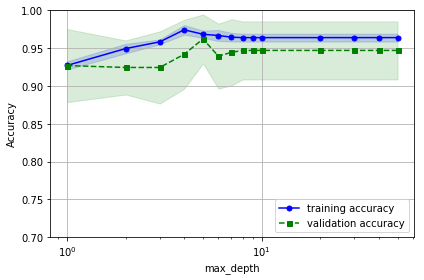

In [61]:
# from sklearn.model_selection import validation_curve
# Split validation
from sklearn.model_selection import train_test_split
# Class for Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

np.random.seed(42) #the seed used by the random number generator for np

# Specify possible parameter values for C.
# Parameter C: Inverse of regularization strength; 
# C must be a positive float; smaller values specify stronger regularization.
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]

# Compute scores for an estimator with different values of a specified parameter. 
# This is similar to grid search with one parameter. 
# However, this will also compute training scores and is merely a utility for plotting the results.

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'), #Build Logistic Regression Models
                X=X_train, 
                y=y_train, 
                param_name="max_depth", # parameter C: Inverse of regularization strength; must be a positive float. Smaller values of paramter C specify stronger regularization.
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="accuracy", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()  

# KNN

In [63]:
from sklearn import neighbors, datasets
from sklearn.model_selection import GridSearchCV 

gsknn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)

gsknn_fit = gsknn.fit(X_train_std, y_train)          
y_pred_knn = gsknn_fit.predict(X_test_std)

## best parameter
print(gsknn.best_params_)

## best estimator
print("KNN parameters: \n", gsknn_fit.best_estimator_)

## best score
print("Best score: ", gsknn.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gsknn.score(X_train_std, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gsknn.score(X_test_std, y_test))
print(classification_report(y_test, y_pred_knn))
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
Confusion_Matrix = pd.DataFrame(confusion_matrix(y_test,y_pred_knn),columns=["Predicted benign","Predicted malignant"],index=["Actual benign","Actual malignant"])
Confusion_Matrix

{'n_neighbors': 9, 'weights': 'uniform'}
KNN parameters: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')
Best score:  0.9673366834170855
Training score:  0.9698492462311558
Test accuracy:  0.9532163742690059
             precision    recall  f1-score   support

          B       0.94      0.99      0.96       107
          M       0.98      0.89      0.93        64

avg / total       0.95      0.95      0.95       171



,Predicted benign,Predicted malignant
Actual benign,106,1
Actual malignant,7,57


In [47]:
scores=cross_val_score(gsknn, X_train_std, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.962 +/- 0.031


# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression 

gslr = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=10)

gslr_fit = gslr.fit(X_train, y_train)          
y_pred_lr = gslr_fit.predict(X_test)

## best parameter
print(gslr.best_params_)

## best estimator
print("Logistic parameters: \n", gslr_fit.best_estimator_)

## best score
print("Best score: ", gslr.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gslr.score(X_train, y_train))

## The overall accuracy on the test set:
print("Test accuracy: ", gslr.score(X_test, y_test))

{'C': 1000000, 'penalty': 'l1'}
Logistic parameters: 
 LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Best score:  0.9673366834170855
Training score:  0.9949748743718593
Test accuracy:  0.9590643274853801


In [88]:
scores=cross_val_score(gslr, X_train, y_train, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.955 +/- 0.033


In [56]:
from __future__ import division, print_function, unicode_literals

%matplotlib inline
# Import necessary libraries and specify that graphs should be plotted inline. 

from sklearn import linear_model # The sklearn.linear_model module implements generalized linear models
import numpy as np # NumPy is the package for scientific computing with Python



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1) # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)   # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") #Show legend of the plot at the best location possible
    return plt # function that returns the plot as an output

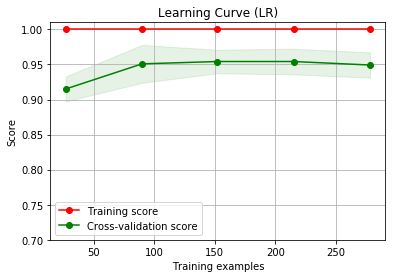

In [57]:
# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# kNN classifier class
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt



title = "Learning Curve (LR)"

# Plots the learning curve based on the previously defined function for the kNN classifier. Uses the 
# random permutation cross-validator
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
plot_learning_curve(estimator, title, X_train, y_train, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show() # Display the figure

In [85]:
c["malignant"] = c.iloc[:,1].str.replace("M","1")
c["malignant"]= c["malignant"].str.replace("B","0")
c["malignant"]=c["malignant"].astype(int)
c.describe()
X = c.iloc[:,2:-2]
y = c.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# ROC 

10-fold cross validation:

ROC AUC: 0.99 (+/- 0.02) [Logistic regression]
ROC AUC: 0.95 (+/- 0.03) [Decision tree]
ROC AUC: 0.96 (+/- 0.04) [KNN]


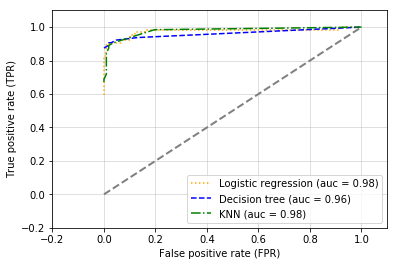

In [90]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Logistic Regression Classifier
clf1 = LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


# Decision Tree Classifier
clf2 = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


# kNN Classifier
clf3 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']
all_clf = [clf1, clf2, clf3]

print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

colors = [ 'orange', 'blue', 'green']      #Colors for visualization
linestyles = [':', '--', '-.', '-']        #Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.2, 1.1])   #limits for x axis
plt.ylim([-0.2, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()